In [ ]:
'''
Import required packages
'''

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import math
from scipy.stats import pearsonr

import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
import glob,os
import random
import os,shutil
import pickle

In [ ]:
# load the xgboost model
xgb_model_loaded = pickle.load(open('path stored the model', "rb"))

## 1. Prepare the input sequence at each grid point (pd.DataFrame)
### - Dynamic variables: Tair (GLDAS), Soil T(GLDAS), P(mat), SH(mat), LH(mat), LW SW(net long wave, GLDAS), SW(net short wave, GLDAS), WS(GLDAS), SWC(GLDAS)
#### create numpy array of each variable with shape (time, 1)¶
For data collected from GLDAS, we first need to calculate the monthly mean since they are all daily variables.
For Soil Temperature from GLDAS, there are several ST at different soil levels available to use. I am not sure which level is mostly close to the one we measured from FLUXNET. So you can choose the most reasonable one. And this is the same case for soil water content.




In [ ]:
# Tair

# Soil T

# P

# SH

# LH

# LW

# SW

# WS

# SWC


### - Static variables: month, lat, lon, elevation(mat) 
#### Pre-processing the static variables -- create numpy array of each variable with shape (time, 1) 

In [ ]:
# Month: show as 1, 2, 3, 4, 5... in numbers

# Elavation: 

# lat:

# lon:

### The input variables at one grid point should have the following sequences:
lat, lon,Month,Soil T, Air T,P,	Sensible heat,Latent heat,	Wind speed,	SW, LW, Soil water content,	Elavation, rot_45_x, rot_45_y, rot_30_x, rot_30_y

In [ ]:
# The input dataframe at one grid point should be:
Input = pd.DataFrame(data = ['concatenate numpy array of dynamic and static variables according to the order as shown in columns'],
                     columns = ['lat', 'lon','Month','Soil T', 'Air T','Prec', 'Sensible heat','Latent heat', 'Wind speed', 'SW', 'LW'
                                        , 'Soil water content', 'Elavation'])

# data preprocess -- static vairbales -- add rotated lat and lon here: 'rot_45_x','rot_45_y', 'rot_30_x', 'rot_30_y'
def rotation(data):
  '''
  # most frequently used degrees are 30,45,60
  input: dataframe containing Latitude(x) and Longitude(y)
  '''
  rot_45_x = (0.707 * data['lat']) + (0.707 * data['lon'])
  
  rot_45_y = (0.707 * data['lon']) + (0.707 * data['lat'])
  
  rot_30_x = (0.866 * data['lat']) + (0.5 * data['lon'])
  
  rot_30_y = (0.866 * data['lon']) + (0.5 * data['lat'])
  
  return rot_45_x, rot_45_y, rot_30_x, rot_30_y

Input['rot_45_x'],Input['rot_45_y'],Input['rot_30_x'], Input['rot_30_y']=rotation(Input)

### May also give a number or name to each grid point here

In [ ]:
Input.insert(0, "Site", ['sequence of the name (same length as the time period)'], True)

### Then we repeat this step for all the grid points, and finally for the prediction, we would like to have an Input dataset as:
'Sites' should be the name of the grid point here
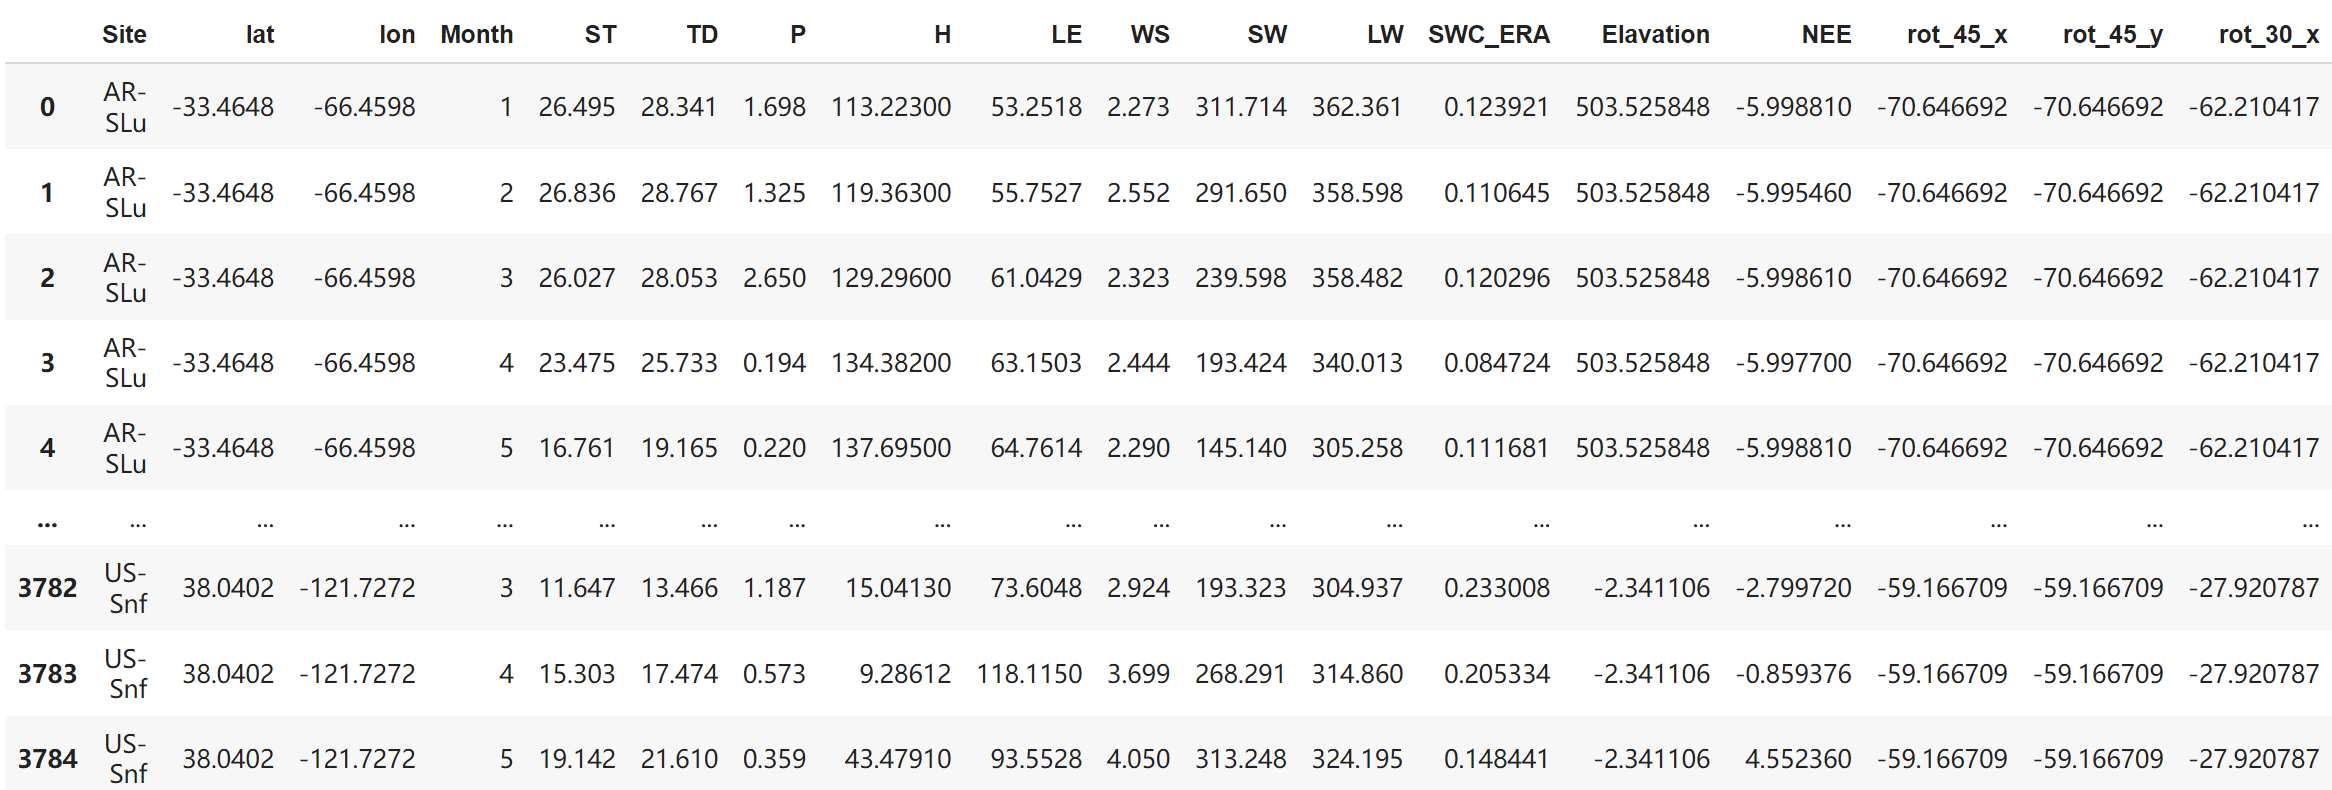

## 2. Make prediction. 
### We will get a numpy array 'prediction' that contains results at each grid point at each time point. It is better to transfer the numpy array into a dataframe as 'Input', with the number or name at each grid point as well as the timestamp

In [ ]:
predictions = xgb_model_loaded.predict(Input)

# make it to a dataframe again; the numpy array might be large to load